In [1]:
import numpy as np 
import urdf2casadi.urdfparser as u2c
from urdf2casadi.geometry import plucker
from urdf_parser_py.urdf import URDF, Pose
import PyKDL as kdl
import kdl_parser.kdl_parser_py.kdl_parser_py.urdf as kdlurdf
from timeit import Timer, timeit, repeat
import rbdl
import pybullet as pb


In [2]:
def median(lst):
    n = len(lst)
    if n < 1:
            return None
    if n % 2 == 1:
            return sorted(lst)[n//2]
    else:
            return sum(sorted(lst)[n//2-1:n//2+1])/2.0
        
def average(lst): 
    return sum(lst) / len(lst) 

In [3]:
#pb.connect(pb.DIRECT)
#pbmodel = pb.loadURDF("pantilt.urdf")
ndofs = 30
urdf_nr = list(range(ndofs + 1))
urdf_nr.pop(0)

#storage for timing data
mediantime_kdl = [None]*ndofs
mediantime_u2c = [None]*ndofs
mediantime_rbdl = [None]*ndofs
mediantime_pb = [None]*ndofs
mintime_kdl = [None]*ndofs
mintime_u2c = [None]*ndofs
mintime_rbdl = [None]*ndofs
mintime_pb = [None]*ndofs
averagetime_kdl = [None]*ndofs
averagetime_u2c = [None]*ndofs
averagetime_rbdl = [None]*ndofs
averagetime_pb = [None]*ndofs
    
for i in range(ndofs):    
    print i
    path_to_urdf = "/home/lillmaria/urdf2casadi/examples/timing/urdf4timing/" + str(urdf_nr[i]) + "dof.urdf"
    end_link = "link" + str(urdf_nr[i])
    root = 'base_link'
    tip = end_link
    
    ok, kdl_tree = kdlurdf.treeFromFile(path_to_urdf)
    kdlmodel = kdl_tree.getChain(root,tip)
    
    asd = u2c.URDFparser()
    robot_desc = asd.from_file(path_to_urdf)
    
    jlist, names, qmax, qmin = asd.get_joint_info(root, tip)
    njoints = len(jlist)

    g_kdl = kdl.Vector()
    M_kdl = kdl.JntSpaceInertiaMatrix(6)
    #M_rbdl = (rbdlmodel.q_size, rbdlmodel.q_size)
    #M_rbdl = np.zeros(M_rbdl)

    q_kdl = kdl.JntArray(njoints)
    q_np = np.zeros(njoints)
    q_none = [None]*njoints

    nitr = 50000
    nrepeat = 10
    
    def M_kdl_func():
        for j in range(njoints):
            q_kdl[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
            #qdot[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

        kdl.ChainDynParam(kdlmodel, g_kdl).JntToMass(q_kdl, M_kdl)

    timeit_kdl = repeat("M_kdl_func()", setup = "from __main__ import M_kdl_func", repeat = nrepeat, number = nitr)
    mintime_kdl[i] = min(timeit_kdl)
    mediantime_kdl[i] = median(timeit_kdl)
    averagetime_kdl[i] = average(timeit_kdl)
    
    
    M_u2c = asd.get_jointspace_inertia_matrix(root, tip)
    def M_u2c_func():   
        for j in range(njoints):
            q_none = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
            #qdot_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

        M_u2c(q_none)

    timeit_u2c = repeat("M_u2c_func()", setup = "from __main__ import M_u2c_func", repeat = nrepeat, number = nitr)
    mintime_u2c[i] = min(timeit_u2c)
    mediantime_u2c[i] = median(timeit_u2c)
    averagetime_u2c[i] = average(timeit_u2c)


    
    

0
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
/home/lillmaria/urdf2casadi/examples/timing/urdf4timing/1dof.urdf
1
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
/home/lillmaria/urdf2casadi/examples/timing/urdf4timing/2dof.urdf
2
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
/home/lillmaria/urdf2casadi/examples/timing/urdf4timing/3dof.urdf
3
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
/home/lillmaria/urdf2casadi/examples/timing/urdf4timing/4dof.urdf
4
The ro

In [4]:
print mintime_u2c
print mintime_kdl

[0.478924036026001, 0.570235013961792, 0.6214799880981445, 0.6743521690368652, 0.7084929943084717, 0.7595429420471191, 0.8060688972473145, 0.9138538837432861, 0.9284148216247559, 1.0143961906433105, 1.018733024597168, 1.1282448768615723, 1.1512179374694824, 1.2227590084075928, 1.2567050457000732, 1.3008489608764648, 1.3560428619384766, 1.4139440059661865, 1.4895269870758057, 1.5644781589508057, 1.6387050151824951, 1.669321060180664, 1.772589921951294, 1.8672940731048584, 1.9586679935455322, 1.9635958671569824, 2.131356954574585, 2.1807260513305664, 2.2256360054016113, 2.262017011642456]
[0.3368520736694336, 0.4520409107208252, 0.5814437866210938, 0.6391689777374268, 0.7987370491027832, 1.0138170719146729, 0.932063102722168, 1.002134084701538, 1.1778719425201416, 1.2460148334503174, 1.3361098766326904, 1.4187350273132324, 1.525623083114624, 1.5702471733093262, 1.6633720397949219, 1.7084689140319824, 1.9644289016723633, 2.013917922973633, 2.1214489936828613, 2.225041151046753, 2.26686191

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

joint_nr = list(range(ndofs + 1))
joint_nr.pop(0)
plt.scatter(joint_nr, mediantime_kdl, c='r', marker='x', label='kdl')
plt.scatter(joint_nr, mediantime_u2c, c='fuchsia', marker='s', label='u2c')
#plt.scatter(joint_nr, mediantime_rbdl, c='b', marker='s', label='rbdl')
#plt.scatter(joint_nr, mediantime_pb, c='r', marker='s', label='pybullet')
plt.legend(loc='upper left')
plt.show()

<Figure size 640x480 with 1 Axes>

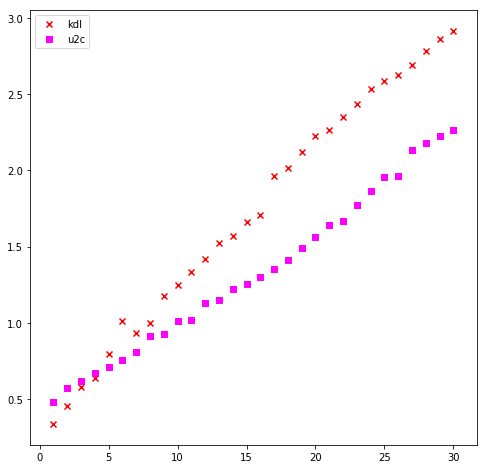

In [10]:
#joint_nr = list(range(ndofs + 1))
#joint_nr.pop(0)
min_fig = plt.figure(figsize = (8, 8))
plt.scatter(joint_nr, mintime_kdl, c='r', marker='x', label='kdl')
plt.scatter(joint_nr, mintime_u2c, c='fuchsia', marker='s', label='u2c')
#plt.scatter(joint_nr, mediantime_rbdl, c='b', marker='s', label='rbdl')
#plt.scatter(joint_nr, mediantime_pb, c='r', marker='s', label='pybullet')
plt.legend(loc='upper left')
min_fig.show()


[Text(0,0,'KDL'), Text(0,0,'U2C')]

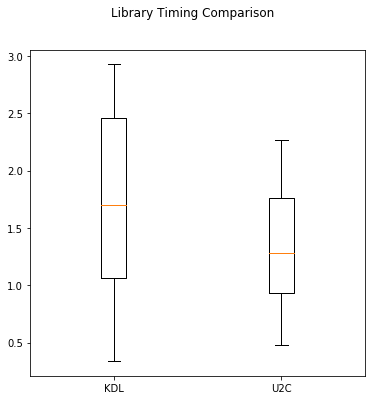

In [8]:
timing_scores = [mediantime_kdl, mediantime_u2c]
names = ["KDL", "U2C"]#, "RBDL", "pybullet"]
boxplot = plt.figure(figsize = (6, 6))
boxplot.suptitle("Library Timing Comparison")
ax = boxplot.add_subplot(111)
ax.boxplot(timing_scores)
#plt.boxplot(timing_scores)
ax.set_xticklabels(names)


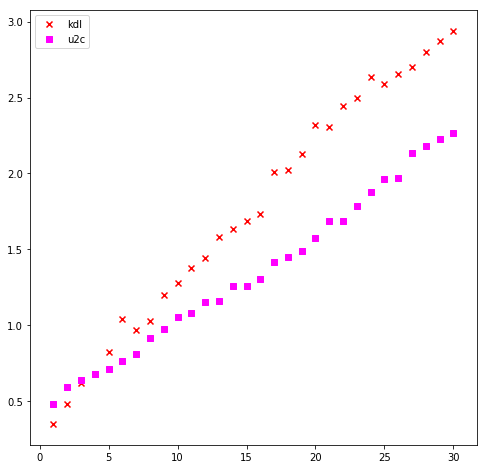

In [9]:
av_fig = plt.figure(figsize = (8, 8))
plt.scatter(joint_nr, averagetime_kdl, c='r', marker='x', label='kdl')
plt.scatter(joint_nr, averagetime_u2c, c='fuchsia', marker='s', label='u2c')
#plt.scatter(joint_nr, mediantime_rbdl, c='b', marker='s', label='rbdl')
#plt.scatter(joint_nr, mediantime_pb, c='r', marker='s', label='pybullet')
plt.legend(loc='upper left')
av_fig.show()


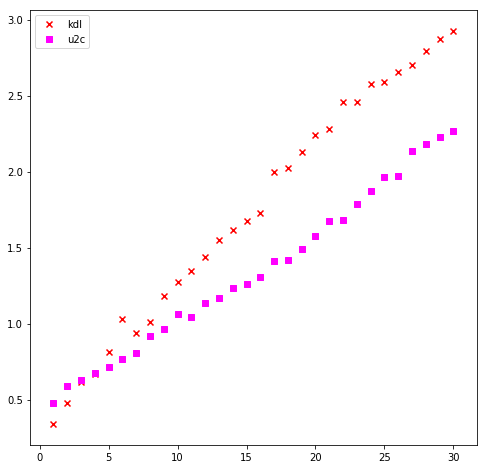

In [11]:
median_fig = plt.figure(figsize = (8, 8))
plt.scatter(joint_nr, mediantime_kdl, c='r', marker='x', label='kdl')
plt.scatter(joint_nr, mediantime_u2c, c='fuchsia', marker='s', label='u2c')
#plt.scatter(joint_nr, mediantime_rbdl, c='b', marker='s', label='rbdl')
#plt.scatter(joint_nr, mediantime_pb, c='r', marker='s', label='pybullet')
plt.legend(loc='upper left')
median_fig.show()

[0 1]


([<matplotlib.axis.XTick at 0x7fdc3c3aa050>,
 <a list of 2 Text xticklabel objects>)

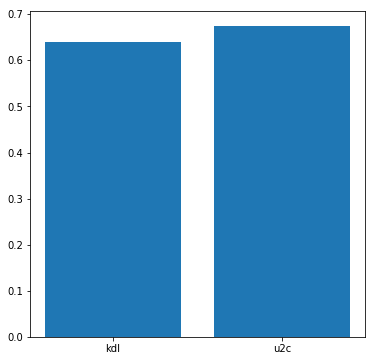

In [16]:
hist = plt.figure(figsize = (6, 6))
x = np.arange(2)
print x
plt.bar(x, height= [mintime_kdl[3], mintime_u2c[3]])
plt.xticks(x, ['kdl','u2c'])

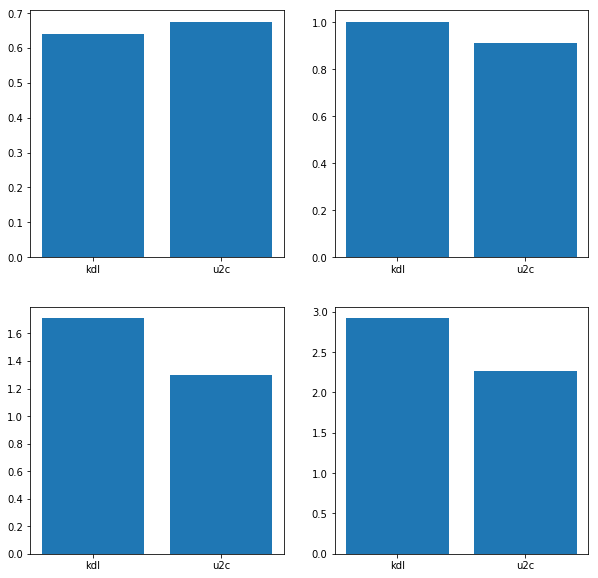

In [26]:
fig = plt.figure(figsize = (17, 17))
nplots = 31
j = 0
for i in range(1, nplots):
    plt.subplot(5, 6, i)
    plt.bar(x, height= [mintime_kdl[j], mintime_u2c[j]])
    plt.xticks(x, ['kdl','u2c'])
    j += 1

plt.show()

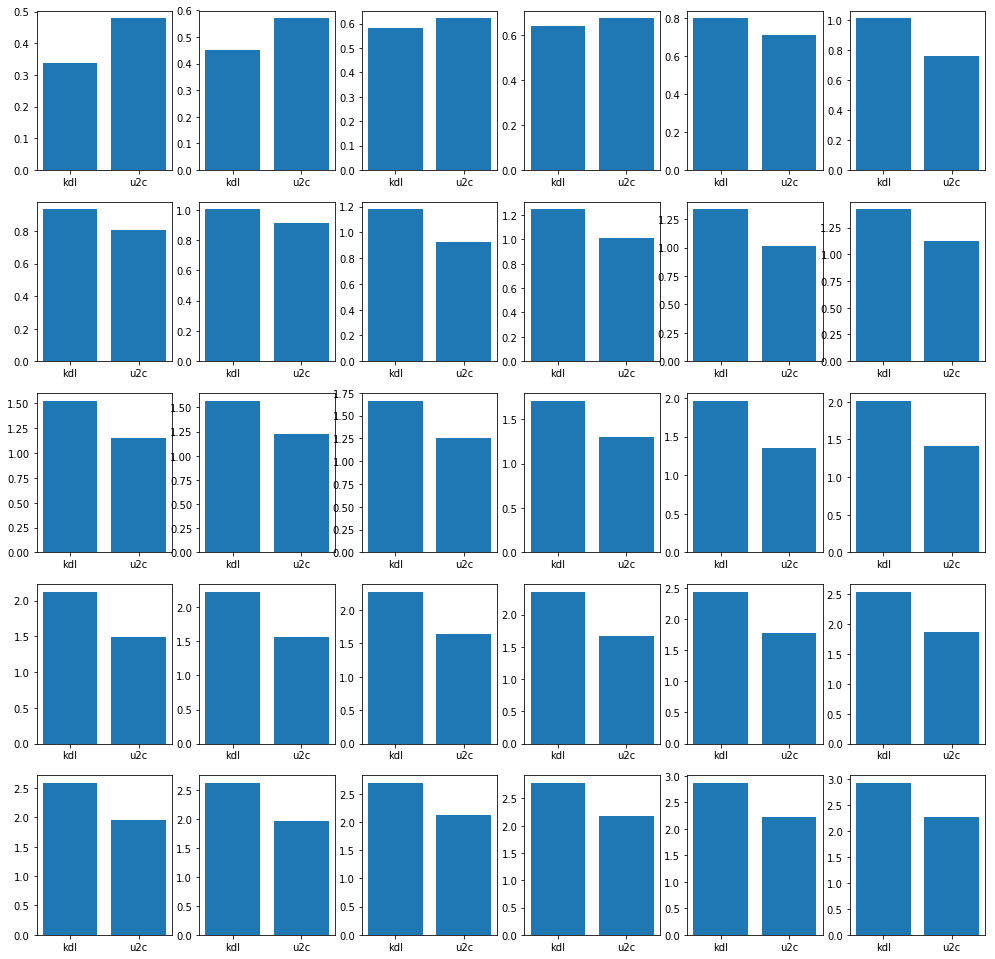

In [33]:
fig = plt.figure(figsize = (17, 17))
nplots = 31
j = 0
for i in range(1, nplots):
    plt.subplot(5, 6, i)
    plt.bar(x, height= [mintime_kdl[j], mintime_u2c[j]])
    plt.xticks(x, ['kdl','u2c'])
    j += 1

plt.show()

In [8]:
#kjoere alt og lagre data:

def M_kdl_func():
    for j in range(njoints):
        q_kdl[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        #qdot[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    kdl.ChainDynParam(kdlmodel, g_kdl).JntToMass(q_kdl, M_kdl)

timeit_kdl = repeat("M_kdl_func()", setup = "from __main__ import M_kdl_func", repeat = nrepeat, number = nitr)
mintime_kdl[njoints-1] = min(timeit_kdl)
mediantime_kdl[njoints-1] = median(timeit_kdl)
averagetime_kdl[njoints-1] = average(timeit_kdl)
#print median(timeit_kdl)
#print average(timeit_kdl)
#print timeit_kdl
#print min(timeit_kdl)
#print max(timeit_kdl)

In [9]:
M_u2c = asd.get_jointspace_inertia_matrix(root, tip)
def M_u2c_func():   
    for j in range(njoints):
        q_none = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        #qdot_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    M_u2c(q_none)

timeit_u2c = repeat("M_u2c_func()", setup = "from __main__ import M_u2c_func", repeat = nrepeat, number = nitr)

mintime_u2c[njoints-1] = min(timeit_u2c)
mediantime_u2c[njoints-1] = median(timeit_u2c)
averagetime_u2c[njoints-1] = average(timeit_u2c)
#print median(timeit_u2c)
#print average(timeit_u2c)
#print timeit_u2c
#print min(timeit_u2c)
#print max(timeit_u2c)

In [10]:
def M_rbdl_func():
    for j in range(njoints):
        q_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    rbdl.CompositeRigidBodyAlgorithm(rbdlmodel, q_np, M_rbdl)
timeit_rbdl = repeat("M_rbdl_func()", setup = "from __main__ import M_rbdl_func", repeat = nrepeat, number = nitr)
mintime_rbdl[njoints-1] = min(timeit_rbdl)
mediantime_rbdl[njoints-1] = median(timeit_rbdl)
averagetime_rbdl[njoints-1] = average(timeit_rbdl)
print median(timeit_rbdl)
print average(timeit_rbdl)
print timeit_rbdl
print min(timeit_rbdl)
print max(timeit_rbdl)

NameError: global name 'rbdlmodel' is not defined

In [ ]:
def M_pb_func():
    for j in range(njoints):
        q_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
    #print q
    H = pb.calculateMassMatrix(pbmodel, q_none)
timeit_pb = repeat("M_pb_func()", setup = "from __main__ import M_pb_func", repeat = nrepeat, number = nitr)
mintime_pb[njoints-1] = min(timeit_pb)
mediantime_pb[njoints-1] = median(timeit_pb)
averagetime_pb[njoints-1] = average(timeit_pb)
print median(timeit_pb)
print average(timeit_pb)
print timeit_pb
print min(timeit_pb)
print max(timeit_pb)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

joint_nr = list(range(njoints + 1))
joint_nr.pop(0)
plt.scatter(joint_nr, mediantime_kdl, c='peachpuff', marker='x', label='kdl')
plt.scatter(joint_nr, mediantime_u2c, c='fuchsia', marker='s', label='u2c')
plt.scatter(joint_nr, mediantime_rbdl, c='b', marker='s', label='rbdl')
plt.scatter(joint_nr, mediantime_pb, c='r', marker='s', label='pybullet')
plt.legend(loc='upper left')
plt.show()